In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import pickle
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
from ipywidgets import interactive

In [2]:
def read_pkl(filename):
    with open(filename, 'rb') as handle:
        data = pickle.load(handle)
    return data

In [3]:
directory = './training_JAIS_Lunar/'

data_reference = read_pkl(directory+'evaluation_reference_policy.pkl')

data_random = read_pkl(directory+'evaluation_random_policy.pkl')

data_ruled = read_pkl(directory+'evaluation_ruled_based_policy.pkl')

data_cont_U = read_pkl(directory+'evaluation_0.001_final_model.pkl')

In [10]:
colors = ['black', 'steelblue',  
          'red', 'red','red', 'red', 'red','red',
          'lime', 'lime', 'lime', 'lime', 'lime', 'lime']
colors2 = ['black', 'steelblue', 'goldenrod', 
          'forestgreen', 'deeppink','red',
          'lime', 'magenta','saddlebrown', 'olivedrab','salmon']

In [4]:
data = [data_random, data_ruled, data_cont_U]

def plot_all_boxplots():
    fig, axs = plt.subplots(3,1,figsize=(9,10))
    axs[0].set_ylabel('Cumulative reward')
    axs[1].set_ylabel('Cumulative benefit [bits]')
    axs[2].set_ylabel('Cumulative cost [bits]')
    axs[1].set_yscale('log')
    axs[2].set_yscale('log')

    data = [data_reference['reward'], data_random['reward'], data_ruled['reward'], 
            data_cont_U['reward']]
    axs[0].boxplot(data)
    axs[0].set_xticklabels(['Reference','Random', 'Rule-based','Deep Q-Learning'])
    data = [data_reference['benefit'], data_random['benefit'], data_ruled['benefit'], 
            data_cont_U['benefit']]
    axs[1].boxplot(data)
    axs[1].set_xticklabels(['Reference','Random', 'Rule-based','Deep Q-Learning'])
    data = [data_reference['cost'], data_random['cost'], data_ruled['cost'], 
            data_cont_U['cost']]
    axs[2].boxplot(data)
    axs[2].set_xticklabels(['Reference','Random', 'Rule-based','Deep Q-Learning'])
    plt.show()

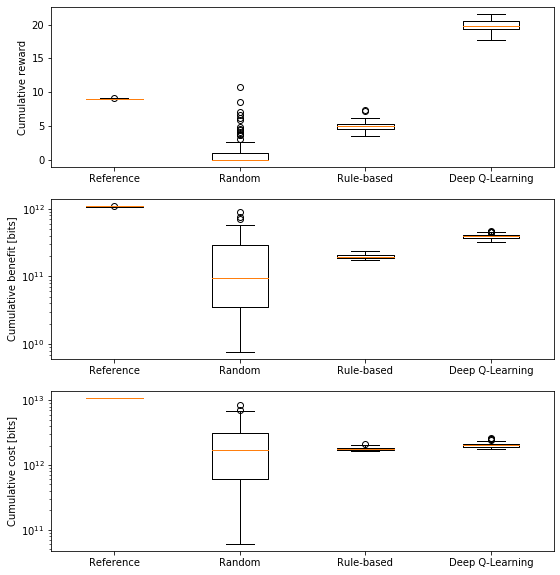

In [5]:
plot_all_boxplots()

In [118]:
plt.savefig('boxplots_all_2.png', format='png', dpi=300)

In [6]:
max_rb = 1
def plot_memory_and_rb3_3subplots(info_policy, n_run):
    neighbor_nodes = ['Mission26', 'Mission27', 'Mission28', 'Mission29', 'Mission30', 'Mission35',
                               'Mission37', 'Mission38', 'Mission39', 'Mission40', 'Mission44']
    %matplotlib inline
    memory=info_policy.iloc[n_run]['memory']
    rb_in=info_policy.iloc[n_run]['rb_in']
    rb_in_norm = [x / max_rb for x in rb_in]
    rb_out=info_policy.iloc[n_run]['rb_out']
    rb_out_norm = [x / max_rb for x in rb_out]
    memory_neighbors_dicts=info_policy.iloc[n_run]['memory_neighbors']
    time=range(len(memory))
    fig, axs = plt.subplots(3,1,figsize=(10,14))
    axs[2].spines["right"].set_position(("axes", 1.1))
    axs[1].plot(time, memory, 'r-', label='memory')
    axs[0].plot(time, 11*np.array(rb_in_norm), 'b-', label='11*Rb_in') 
    axs[0].plot(time, rb_out_norm, 'g-', label='Rb_out') 
    i=0
    for node_id in neighbor_nodes:
        memory_node_i = []
        for memory_neighbors_dict in memory_neighbors_dicts:
            memory_node_i.append(memory_neighbors_dict[node_id])
        axs[2].plot(time, memory_node_i, linestyle='dashed', color=colors2[neighbor_nodes.index(node_id)], label='neighbour node i') 
    axs[2].set_yscale('log')
    axs[0].set_yscale('log')
    axs[1].set_xlabel('time step')  # Add an x-label to the axes.
    axs[1].set_ylabel('Memory utilization')  # Add a y-label to the axes.
    axs[0].set_ylabel('bps')  # Add a y-label to the axes.
    axs[2].set_ylabel('bits') 
    axs[1].set_ylim(0, 1) 
    axs[0].set_ylim(1e9/512, 10e9) 
    axs[1].legend()  # Add a legend.
    axs[0].legend()  # Add a legend.
#     axs[2].legend()  # Add a legend.

In [11]:
columns=[i for i in range(100)]

def k(run_number):
    print('Episode reward = {}'.format(data_cont_U['reward'][run_number]))
    plot_memory_and_rb3_3subplots(data_cont_U, run_number)
    
interactive_plot = interactive(k, run_number=columns)
interactive_plot

#Plot in paper is run number 3!

interactive(children=(Dropdown(description='run_number', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13…